In [41]:
import tensorflow as tf
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [19]:
from sklearn.datasets import load_breast_cancer

In [20]:
data = load_breast_cancer()

In [21]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [22]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [23]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.33
)

N,D = X_train.shape
print(N,D)

381 30


In [33]:
scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [36]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [38]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3129 - loss: 0.9393 - val_accuracy: 0.3617 - val_loss: 0.8679
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3709 - loss: 0.8533 - val_accuracy: 0.4521 - val_loss: 0.7815
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5167 - loss: 0.7475 - val_accuracy: 0.5638 - val_loss: 0.7079
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6230 - loss: 0.6503 - val_accuracy: 0.6489 - val_loss: 0.6469
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7282 - loss: 0.5687 - val_accuracy: 0.6702 - val_loss: 0.5962
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7626 - loss: 0.5290 - val_accuracy: 0.7234 - val_loss: 0.5528
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8045 - loss: 0.5051 - val_accuracy: 0.7872 - val_loss: 0.5169
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8709 - loss: 0.4524 - val_accuracy: 0.

In [40]:
print("Train Score: ", model.evaluate(X_train, y_train))
print("Test Score: ", model.evaluate(X_test, y_test))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9791 - loss: 0.0853 
Train Score:  [0.09014013409614563, 0.9763779640197754]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9519 - loss: 0.1496 
Test Score:  [0.13950447738170624, 0.9627659320831299]


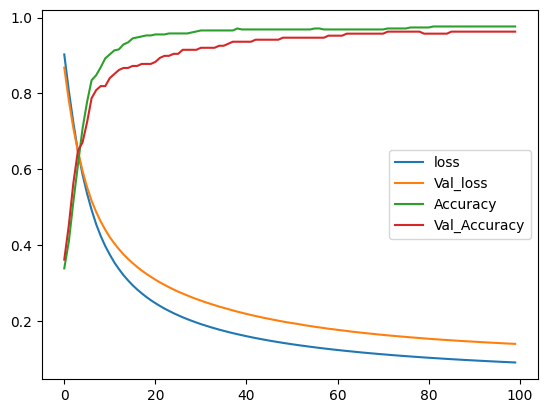

In [43]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='Val_loss')
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend();